# Band Structure of He (mp-23156)

In [2]:
from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as img

## Electronic band structure

In [6]:
with MPRester("tA2HQFkWnG7wRPHf") as mp:
    # Create a structure for material id mp-23156 (He)
    band_structure = mp.get_bandstructure_by_material_id("mp-23156")

As a reminder we will plot here the Brillouin, zones and, just below it, the band structure

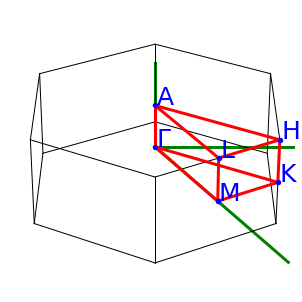

In [149]:
bsplotter = BSPlotter(band_structure)
bsplotter.plot_brillouin()

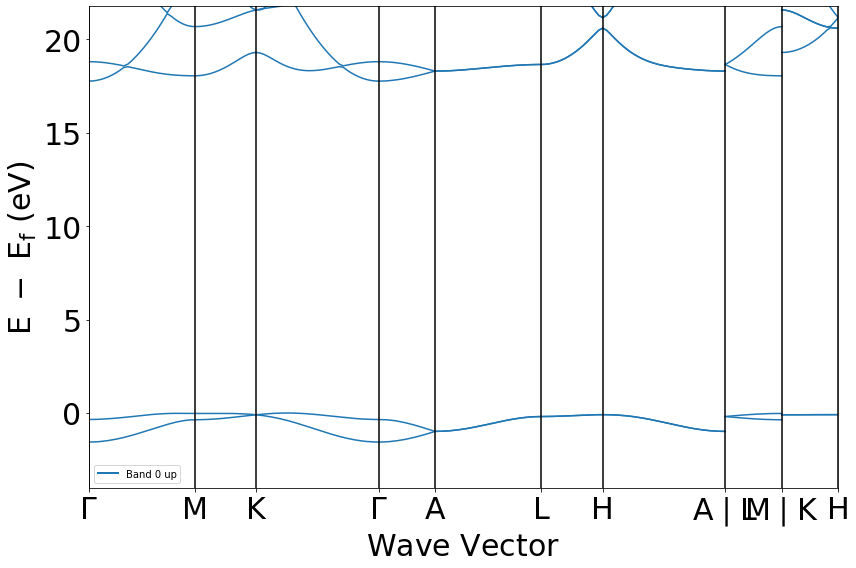

In [148]:
bsplotter.show()

In [7]:
k=band_structure.get_band_gap()
for key in k:
    print(key,":",k[key])

direct : False
energy : 17.7675
transition : (0.247,0.247,0.000)-\Gamma


The band gap is indirect and has an energy of 17.7675 eV. This means that ther must exist an interaction with a photon and with phonon in order to modify the wave vector which makes the transition less probable than a direct band gap material. He is clearly an insulator. This is very logical since helium is what we call a noble gas. It has very few interactions with other atomes or molecules and is often qualified as an inert gas. The band structure and the electron partition explain this phenomenon.

In [144]:
dt = bsplotter.bs_plot_data()
En = dt.get('energy')
Dist = dt.get('ticks').get('distance')
Dist = np.array([Dist[0], Dist[1], Dist[3], Dist[5], Dist[7], Dist[9], Dist[11], Dist[13], Dist[14], Dist[15]])

# Distance between branches :
d = Dist[1:] - Dist[0:-1]
# LAST VALENCE BAND (Second (0-1) for (He)) :
penteV = np.zeros(np.shape(d))
for i in range(np.size(d)):
    penteV[i] = ((En.get('1')[i][1][-1]) - (En.get('1')[i][1][0]))/d[i]

# FIRST CONDUCTION BAND (Third (0-1-2) for (He)) :
penteC = np.zeros(np.shape(d))
for i in range(np.size(d)):
    penteC[i] = ((En.get('1')[i][2][-1]) - (En.get('1')[i][2][0]))/d[i]
    
# Finding out the max
maxV = np.max(abs(penteV))
minV = np.min(abs(penteV))
maxC = np.max(abs(penteC))
minC = np.min(abs(penteC))

LAST VALENCE BAND :
 
- Direction presenting the most dispertion :  Γ - A  (maxV= 0.9025747870144641 )
- Direction presenting the least dispertion : M|K - H  (minV= 0.007930988243025898 )
 
FIRST CONDUCTION BAND :
 
- Direction presenting the most dispertion : L - H  (maxV= 2.5351614859281972 )
- Direction presenting the least dispertion : Γ - M  (minV= 0.21401457571883495 )


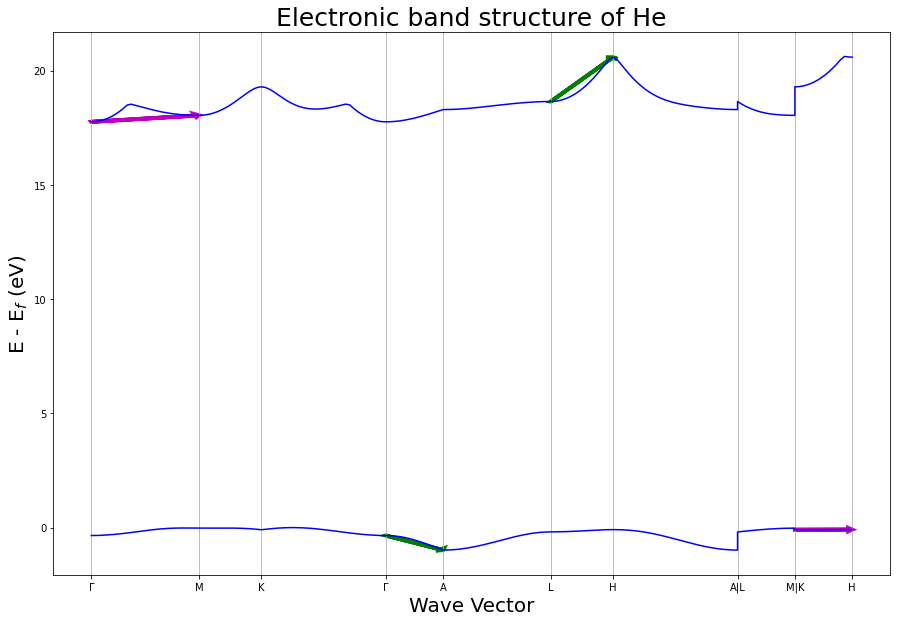

In [110]:
print("LAST VALENCE BAND :")
print(" ")
print("- Direction presenting the most dispertion :  \u0393 - A ","(maxV=",maxV,")")
print("- Direction presenting the least dispertion : M|K - H ","(minV=",minV,")")
print(" ")
print("FIRST CONDUCTION BAND :")
print(" ")
print("- Direction presenting the most dispertion : L - H ","(maxV=",maxC,")")
print("- Direction presenting the least dispertion : \u0393 - M ","(minV=",minC,")")

a = dt.get('distances')
b = [y for x in a for y in x]
Vx = np.ndarray(len(b))
Cx = np.ndarray(len(b))
count=0
for i in range (9):
    for j in range(len(En.get('1')[i][1])):
        Vx[count]=En.get('1')[i][1][j]
        Cx[count]=En.get('1')[i][2][j]
        count+=1
fig, axs = plt.subplots(1,1,figsize=(15,10))
plt.plot(b,Vx,"b-")
plt.plot(b,Cx,"b-")
axs.set_xticks(Dist)
axs.set_xticklabels(['\u0393','M','K','\u0393','A','L','H','A|L','M|K','H'])
plt.ylabel('E - E$_{f}$ (eV)',fontsize=20)
plt.xlabel('Wave Vector',fontsize=20)
plt.title('Electronic band structure of He',fontsize=25)
axes = plt.gca()
axes.xaxis.grid()

plt.arrow(Dist[3], En.get('1')[3][1][0], Dist[4] - Dist[3] ,  En.get('1')[3][1][-1] - En.get('1')[3][1][0],
          head_width=0.15, head_length=0.05, linewidth=4, color='g', length_includes_head=True)
plt.arrow(Dist[8], En.get('1')[8][1][0], Dist[9] - Dist[8] ,  En.get('1')[8][1][-1] - En.get('1')[8][1][0],
          head_width=0.15, head_length=0.05, linewidth=4, color='m', length_includes_head=True)

plt.arrow(Dist[5], En.get('1')[5][2][0], Dist[6] - Dist[5] ,  En.get('1')[5][2][-1] - En.get('1')[5][2][0],
          head_width=0.15, head_length=0.05, linewidth=4, color='g', length_includes_head=True)
plt.arrow(Dist[0], En.get('1')[0][2][0], Dist[1] - Dist[0] ,  En.get('1')[0][2][-1] - En.get('1')[0][2][0],
          head_width=0.15, head_length=0.05, linewidth=4, color='m', length_includes_head=True)

plt.show()

## Effective mass

The effective mass can be calculated using the following formula:

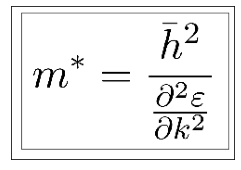

In [12]:
image_1=img.imread('eff_mass.png')
fig, axes = plt.subplots(figsize=(4,4))
axes.get_xaxis().set_visible(False)
axes.get_yaxis().set_visible(False)
axes.imshow(image_1)
plt.show()

Where $\bar{h}$ = 1.054571817E-34 J.s is Planck's constant divided by 2$\pi$ (also called Planck's reduced constant) and the denominator is the second derivative of the electronic band's energy with respect to wave vector k.
In order to calculate this second derivative, we consider a parabolic dispoersion. This parabolic approximation is calculated with the maximum of valence band (resp the minimum of conduction band) and another point belonging to the alectronic band.

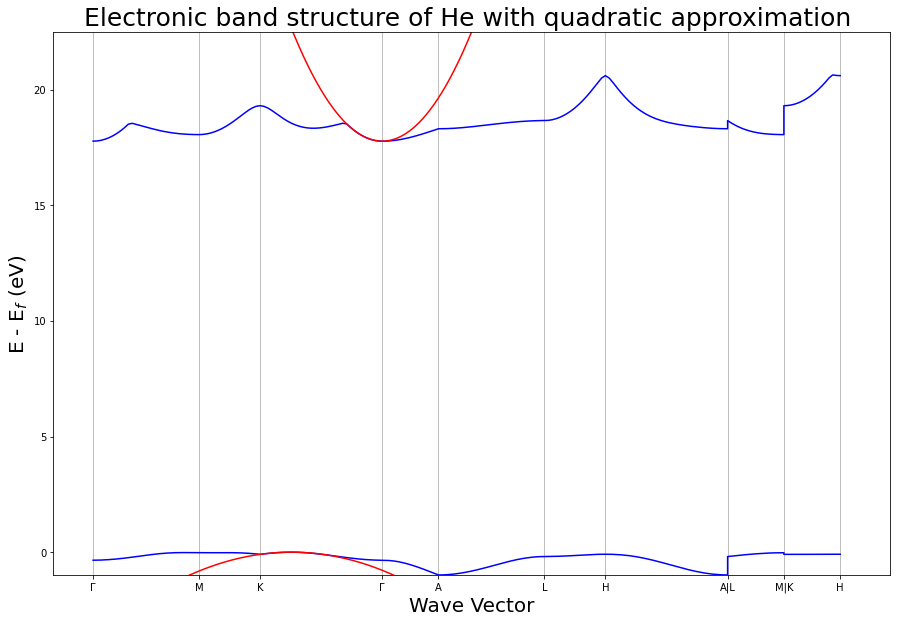

In [145]:

# Reduced Planck constant [J.s]
h_barre = 1.054571817*(10**-34)
# Electron volt [J]
eV = 1.602176634*(10**-19)
# Angstrom [m]
A = 10**-10

idxV=0
idxC=0
maxV=-10
minC=100
for i in range(len(En.get('1')[2][1])):
    if(En.get('1')[2][1][i]>maxV):
        maxV=En.get('1')[2][1][i]
        idxV=i
    if(En.get('1')[2][2][i]<minC):
        minC=En.get('1')[2][2][i]
        idxC=i

# Last Valence band
[x1,y1] = [a[2][idxV],En.get('1')[2][1][idxV]] # Curb max
[x2,y2] = [a[2][0],En.get('1')[2][1][0]] # literally any other point
  #  parabola equation : f(k) = mV*(k-pV)^2
mV = y2/(x2-x1)**2
pV = x1

def fV(x):
    return mV*(x-pV)**2

xV = np.arange(-1,10,0.01)
yV = fV(xV)

# Frist Condiction band
[x3,y3] = [a[2][idxC],En.get('1')[2][2][idxC]] # min curb
[x4,y4] = [a[2][22],En.get('1')[2][2][22]] # literally any other point
  # parabola equation : f(k) = mC*(k-pC)^2 + y3
mC = (y4-y3)/(x4-x3)**2
pC = x3

def fC(x):
    return mC*(x-pC)**2 + y3

xC = np.arange(-1,10,0.01)
yC = fC(xC)

# Figure
fig, axs = plt.subplots(1,1,figsize=(15,10))
plt.plot(b,Vx,"b-")
plt.plot(b,Cx,"b-")
plt.plot(xV,yV,'r')
plt.plot(xC,yC,'r')
axs.set_xticks(Dist)
axs.set_xticklabels(['\u0393','M','K','\u0393','A','L','H','A|L','M|K','H'])
plt.ylabel('E - E$_{f}$ (eV)',fontsize=20)
plt.xlabel('Wave Vector',fontsize=20)
plt.title('Electronic band structure of He with quadratic approximation ',fontsize=25)
axes = plt.gca()
axes.xaxis.grid()
plt.xlim(-0.5,10)
plt.ylim(-1,22.5)
plt.show()



From this point on, using the quadratic approximations, we can determine the effective mass of both the valence and the conduction band


### Effective mass upon valence band

In [146]:
print('Parabola equation : f(k) = ', mV,'* ( k -',pV,')²')
print('Second derivative of the parabola : f\'\'(k) = ', 2*mV,'[eV.A²]')
print("              where A = ",A,"[m], one Angstrom")
print(" ")
print('In order to calculate le effective mass, one must adapt the units of our second derivative :')
print('f\'\'(k) = ',2*mV*(A**2)*eV, '[J.m²]')
print(" ")
print('Effective mass is :')
print('m* = ',abs((h_barre**2)/(2*mV*(A**2)*eV)),'[kg]')

Parabola equation : f(k) =  -0.6058390026836185 * ( k - 2.489472292912886 )²
Second derivative of the parabola : f''(k) =  -1.211678005367237 [eV.A²]
              where A =  1e-10 [m], one Angstrom
 
In order to calculate le effective mass, one must adapt the units of our second derivative :
f''(k) =  -1.9413221881311137e-39 [J.m²]
 
Effective mass is :
m* =  5.728681843796917e-30 [kg]


### Effective mass upon conduction band

In [147]:
print('Parabola equation : f(k) = ', mC,'* ( k -',pC,')² + ',y3)
print('Second derivative of the parabola : f\'\'(k) = ', 2*mC,'[eV.A²]')
print("              where A = ",A,"[m], one Angstrom")
print(" ")
print('In order to calculate le effective mass, one must adapt the units of our second derivative :')
print('f\'\'(k) = ',2*mC*(A**2)*eV, '[J.m²]')
print(" ")
print('Effective mass is :')
print('m* = ',(h_barre**2)/(2*mC*(A**2)*eV),'[kg]')


Parabola equation : f(k) =  3.759313344325508 * ( k - 3.6267419025201697 )² +  17.7675
Second derivative of the parabola : f''(k) =  7.518626688651016 [eV.A²]
              where A =  1e-10 [m], one Angstrom
 
In order to calculate le effective mass, one must adapt the units of our second derivative :
f''(k) =  1.2046168000325452e-38 [J.m²]
 
Effective mass is :
m* =  9.232161772778158e-31 [kg]
